ЗАДАНИЕ


Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов -- 500 пользователей. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

|**Услуги**|**Тариф «Смарт»**|**Тариф «Ультра»**|
|:------|:------|:-----|
Ежемесячная плата | 550 рублей| 1950 рублей|
Включено | 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика| Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика|
Стоимость услуг сверх тарифного пакета | минута разговора: 3 рубля; сообщение: 3 рубля; 1 Гб интернет-трафика: 200 рублей | минута разговора: 1 рубль; сообщение: 1 рубль; 1 Гб интернет-трафика: 150 рублей|

Обратите внимание: Компания всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

**Имеются следующие таблицы**

Таблица `users` (информация о пользователях):

|Имя поля|Описание поля|
|-------------:|:------------|
|**user_id** | уникальный идентификатор пользователя|
|**first_name** | имя пользователя|
|**last_name** | фамилия пользователя|
|**age** | возраст пользователя (годы)|
|**reg_date** | дата подключения тарифа (день, месяц, год)|
|**churn_date** | дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)|
|**city** | город проживания пользователя|
|**tariff** | название тарифного плана|

Таблица `calls` (информация о звонках):

|Имя поля|Описание поля|
|-------------:|:------------|
|**id** | уникальный номер звонка|
|**call_date** | дата звонка|
|**duration** | длительность звонка в минутах|
|**user_id** | идентификатор пользователя, сделавшего звонок|

Таблица `messages` (информация о сообщениях):

|Имя поля|Описание поля|
|-------------:|:------------|
|**id** | уникальный номер сообщения|
|**message_date** | дата сообщения|
|**user_id** |  идентификатор пользователя, отправившего сообщение|

Таблица `internet` (информация об интернет-сессиях):

|Имя поля|Описание поля|
|-------------:|:------------|
|**id** | уникальный номер сессии|
|**mb_used** | объём потраченного за сессию интернет-трафика (в мегабайтах)|
|**session_date** | дата интернет-сессии|
|**user_id** | идентификатор пользователя|

Таблица `tariffs` (информация о тарифах):

|Имя поля|Описание поля|
|-------------:|:------------|
|**tariff_name** | название тарифа|
|**rub_monthly_fee** | ежемесячная абонентская плата в рублях|
|**minutes_included** | количество минут разговора в месяц, включённых в абонентскую плату|
|**messages_included** | количество сообщений в месяц, включённых в абонентскую плату|
|**mb_per_month_included** | объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)|
|**rub_per_minute** | стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)|
|**rub_per_message** | стоимость отправки сообщения сверх тарифного пакета|
|**rub_per_gb** | стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)|


Инструкция по выполнению проекта

**Шаг 1. Откройте файл с данными и изучите общую информацию**

-загрузите файлы и изучите общую информацию;

**Шаг 2. Подготовьте данные**
- Приведите данные к нужным типам;
- Найдите и исправьте ошибки в данных. Обратите внимание, что длительность многих звонков — 0.0 минут.  
- Посчитайте для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану);
    - найдите общую сумму затрат всех клиентов за все время.


    АНОМАЛИИ - не обрабатываем.


In [1]:
# Подключение библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Чтение файлов, знакомство с датасетами

df_users = pd.read_csv('users.csv')
df_calls = pd.read_csv('calls.csv')
df_messages = pd.read_csv('messages.csv')
df_internet = pd.read_csv('internet.csv')
df_tariffs = pd.read_csv('tariffs.csv')

In [3]:
df_users.info()
df_calls.info()
df_internet.info()
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.D

In [4]:
df_users.duplicated().sum()
# Дубликатов нет, все клиенты уникальные

0

In [5]:
# Приведем дату к типу datatime64

df_users = df_users.astype({'reg_date': 'datetime64[ns]'})
df_calls = df_calls.astype({'call_date': 'datetime64[ns]'})
df_messages = df_messages.astype({'message_date': 'datetime64[ns]'})
df_internet = df_internet.astype({'session_date': 'datetime64[ns]'})

In [6]:
# Удалим столбец  'Unnamed: 0' из df_internet
df_internet.drop(columns = 'Unnamed: 0', inplace = True)

In [7]:
display(df_users.head(2))
display(df_messages.head(2))
display(df_calls.head(2))
display(df_internet.head(2))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000


**Посчитайте для каждого пользователя:**
        
        - количество сделанных звонков и израсходованных минут разговора по месяцам

In [8]:
# Обработаем нулевые звонки. Таких звонков 39613 и они есть в каждом тарифе (скорее всего это звонки-сбросы) и лучше их удалить из выборки.
# Так как они нас не интересуют(пакет тарифа не расходуется, выручки тоже нет)

calls_0 = df_calls.query('duration == 0.0')
df_calls0_tariff = calls_0.merge(df_users[['user_id', 'tariff']], on='user_id')
df_calls0_tariff 
df_calls['duration'] = df_calls['duration'].replace(0, np.NaN)
df_calls.dropna()

,id,call_date,duration,user_id
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [9]:
df_calls['year_month'] = df_calls['call_date'].dt.to_period('M')

df_calls_users_month = df_calls.groupby(['user_id', 'year_month'])\
    .agg(count_calls = ('id', 'count'),
         duration_sum = ('duration','sum')).reset_index()

    - количество отправленных сообщений по месяцам

In [10]:
df_messages['year_month']=df_messages['message_date'].dt.to_period('M')
df_messages_user_month = df_messages.groupby(['user_id', 'year_month'])\
    .agg(count_messages = ('id', 'count')).reset_index()

    - объем израсходованного интернет-трафика по месяцам

In [11]:
# У нас имеются данные, где объем использованного трафика равен 0. Проделаем те же действия, что и с нулевыми звонками.
internet_0 = df_internet.query('mb_used == 0')
df_internet['mb_used'] = df_internet['mb_used'].replace(0, np.NaN)
df_internet = df_internet.dropna()

In [12]:
df_internet['year_month']=df_internet['session_date'].dt.to_period('M')
df_mb_used_month = df_internet.groupby(['user_id', 'year_month'])\
    .agg(sum_mb_used = ('mb_used','sum')).reset_index()

**Объединим полученные данные в один датасет**

In [13]:
df_calls_messages_internet_agg = df_calls_users_month[['user_id', 'year_month', 'count_calls', 'duration_sum']]\
                                .merge(df_messages_user_month[['user_id', 'year_month', 'count_messages']],
                                                     on=('user_id', 'year_month'), how='outer')\
                                .merge(df_mb_used_month[['user_id', 'year_month', 'sum_mb_used']],
                                                     on=('user_id', 'year_month'), how='outer')

In [14]:
# Заменим значения NaN нулями
df_calls_messages_internet_agg.isna().sum()

df_calls_messages_internet_agg.fillna({'count_calls': 0,
                                      'duration_sum': 0,
                                      'count_messages': 0,
                                      'sum_mb_used': 0}, inplace=True)

df_calls_messages_internet_agg

,user_id,year_month,count_calls,duration_sum,count_messages,sum_mb_used
0,1000,2018-05,22.0,150.06,22.0,2253.49
1,1000,2018-06,43.0,158.90,60.0,23233.77
2,1000,2018-07,47.0,318.80,75.0,14003.64
3,1000,2018-08,52.0,389.87,81.0,14055.93
4,1000,2018-09,58.0,440.14,57.0,14568.91
...,...,...,...,...,...,...
3209,1489,2018-09,0.0,0.00,32.0,17206.30
3210,1489,2018-10,0.0,0.00,21.0,19559.44
3211,1489,2018-11,0.0,0.00,20.0,17491.56
3212,1489,2018-12,0.0,0.00,35.0,17322.51


    - Посчитать помесячную выручку с каждого пользователя 

In [15]:
# Выведем информацию о тарифах
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
def month_calc(name_df):
    calls = name_df['duration_sum']
    messages = name_df['count_messages']
    internet = name_df['sum_mb_used']
    tariff = name_df['tariff']
    
    # достаем лимиты по тарифам на звонки, смс и интернет
    
    minutes_lim = df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'minutes_included'].iloc[0]
    messages_lim = df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'messages_included'].iloc[0]
    internet_lim = df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'mb_per_month_included'].iloc[0]
    
    # переплата по звонкам
    
    call_overlimit = max(calls - minutes_lim, 0)
    call_overpay = call_overlimit * df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_per_minute'].iloc[0]
    
    # переплата по сообщениям
    
    messages_overlimit = max(messages - messages_lim, 0)
    messages_overpay = messages_overlimit * df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_per_message'].iloc[0]
    
    # переплата за трафик интернета
    
    internet_overlimit = max(internet - internet_lim, 0)
    internet_overpay = np.ceil(internet_overlimit/1024)*df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_per_gb'].iloc[0]
    
    return (call_overpay + messages_overpay + internet_overpay + \
           df_tariffs.loc[df_tariffs['tariff_name'] == tariff, 'rub_monthly_fee'].iloc[0])

In [17]:
df = df_calls_messages_internet_agg.merge(df_users[['user_id', 'first_name', 'last_name', 'tariff']],
                                         on='user_id')
df['month_price'] = df.apply(month_calc, axis=1)

    - Общая сумма затрат всех клиентов за все время равна 4841309.02

In [18]:
df['month_price'].sum()

4841309.02

    Сделаем отдельные срезы по двум тарифам. Таким образом, для каждого тарифа будет свой датафрейм. Посмотрим, какому проценту абонентов требовались пакеты услуг сверх предложенных тарифом.

In [19]:
smart = df.loc[df['tariff']=='smart']
ultra = df.loc[df['tariff']=='ultra']

In [20]:
smart['month_price'].sum()

2802209.0199999996

In [21]:
ultra['month_price'].sum()

2039100.0

In [22]:
ultra[df['month_price']>1950]

C:\Users\User\AppData\Local\Temp\ipykernel_4724\80499191.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ultra[df['month_price']>1950]


,user_id,year_month,count_calls,duration_sum,count_messages,sum_mb_used,first_name,last_name,tariff,month_price
159,1024,2018-11,157.0,1083.14,0.0,43107.47,Иулиан,Антипов,ultra,3900.0
160,1024,2018-12,136.0,898.21,0.0,35948.13,Иулиан,Антипов,ultra,2850.0
311,1050,2018-07,35.0,196.35,52.0,35177.91,Рузана,Аничкина,ultra,2700.0
383,1060,2018-12,184.0,1163.11,52.0,43931.36,Яков,Рудаков,ultra,3900.0
782,1124,2018-10,152.0,1159.82,121.0,49745.69,Альбин,Андрианов,ultra,4800.0
...,...,...,...,...,...,...,...,...,...,...
3197,1231,2018-09,0.0,0.00,188.0,33189.47,Касьян,Авдюков,ultra,2400.0
3198,1231,2018-10,0.0,0.00,185.0,31032.93,Касьян,Авдюков,ultra,2100.0
3200,1231,2018-12,0.0,0.00,191.0,32448.00,Касьян,Авдюков,ultra,2250.0
3202,1328,2018-11,0.0,0.00,8.0,35525.58,Рауль,Аркадьев,ultra,2700.0


In [23]:
smart[df['month_price']>550]

C:\Users\User\AppData\Local\Temp\ipykernel_4724\1580029719.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  smart[df['month_price']>550]


,user_id,year_month,count_calls,duration_sum,count_messages,sum_mb_used,first_name,last_name,tariff,month_price
8,1001,2018-11,59.0,408.12,0.0,18429.34,Иван,Ежов,smart,1150.0
11,1002,2018-07,26.0,204.75,11.0,17580.10,Евгений,Абрамович,smart,1150.0
12,1002,2018-08,42.0,269.71,13.0,20319.26,Евгений,Абрамович,smart,1550.0
13,1002,2018-09,36.0,195.85,4.0,16691.08,Евгений,Абрамович,smart,950.0
15,1002,2018-11,32.0,228.03,16.0,18587.28,Евгений,Абрамович,smart,1350.0
...,...,...,...,...,...,...,...,...,...,...
3175,1499,2018-12,69.0,465.16,66.0,13055.58,Гектор,Корнилов,smart,598.0
3210,1489,2018-09,0.0,0.00,32.0,17206.30,Павел,Гончаров,smart,950.0
3211,1489,2018-10,0.0,0.00,21.0,19559.44,Павел,Гончаров,smart,1550.0
3212,1489,2018-11,0.0,0.00,20.0,17491.56,Павел,Гончаров,smart,1150.0


### Пользователи тарифа smart значительно чаще расходовали подключенные пакеты услуг и доплачивали за дополнительные минуты,гб и смс.

## Посмотрим на среднее, дисперсию и стандартное отклонение по параметрам: минуты, смс, гб, выручка

In [24]:
smart[['count_calls','duration_sum','count_messages','sum_mb_used','month_price']].describe()

,count_calls,duration_sum,count_messages,sum_mb_used,month_price
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,58.463437,394.427026,33.384029,16208.386990,1257.159722
std,25.939858,179.962207,28.227876,5870.476681,800.717846
min,0.000000,0.000000,0.000000,0.000000,550.000000
25%,40.000000,267.230000,10.000000,12643.010000,550.000000
50%,60.000000,397.980000,28.000000,16506.840000,961.670000
75%,76.000000,515.070000,51.000000,20042.930000,1731.860000
max,198.000000,1354.220000,143.000000,38552.450000,6613.100000


In [25]:
ultra[['count_calls','duration_sum','count_messages','sum_mb_used','month_price']].describe()

,count_calls,duration_sum,count_messages,sum_mb_used,month_price
count,985.000000,985.000000,985.000000,985.000000,985.000000
mean,73.392893,497.068223,49.363452,19468.805208,2070.152284
std,43.916853,299.904152,47.804457,10087.170752,376.187114
min,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,41.000000,267.750000,6.000000,11770.260000,1950.000000
50%,74.000000,488.100000,38.000000,19308.010000,1950.000000
75%,104.000000,711.470000,79.000000,26837.690000,1950.000000
max,244.000000,1578.060000,224.000000,49745.690000,4800.000000


### Посмотрим на кол-во минут, смс и интернета, которые требовались пользователям в месяц на разных тарифах

Text(0, 0.5, 'Частота')

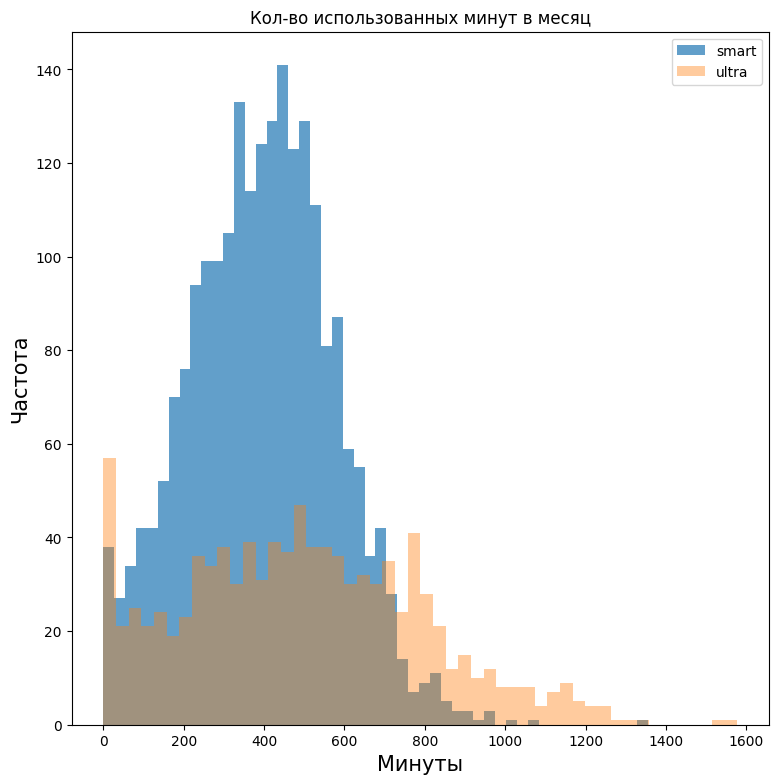

In [26]:
minutes_smart = smart.plot(y = 'duration_sum', kind = 'hist', bins = 50, label = 'smart', figsize = (9, 9), alpha = 0.7, title = 'Кол-во использованных минут в месяц')
minutes_ultra = ultra.plot(y = 'duration_sum', ax = minutes_smart, kind = 'hist', bins = 50, label = 'ultra', figsize = (9, 9), alpha = 0.4)
minutes_smart.set_xlabel('Минуты', fontsize = 15)
minutes_ultra.set_ylabel('Частота', fontsize = 15)

Большинство пользователей тарифа Smart использовали все 500 минут, некоторым требовались дополнительные минуты. В то время как абоненты с тарифом Ultra не использовали свой полный пакет из 3000 минут, обычно им хватало до 800 минут.

Text(0, 0.5, 'Частота')

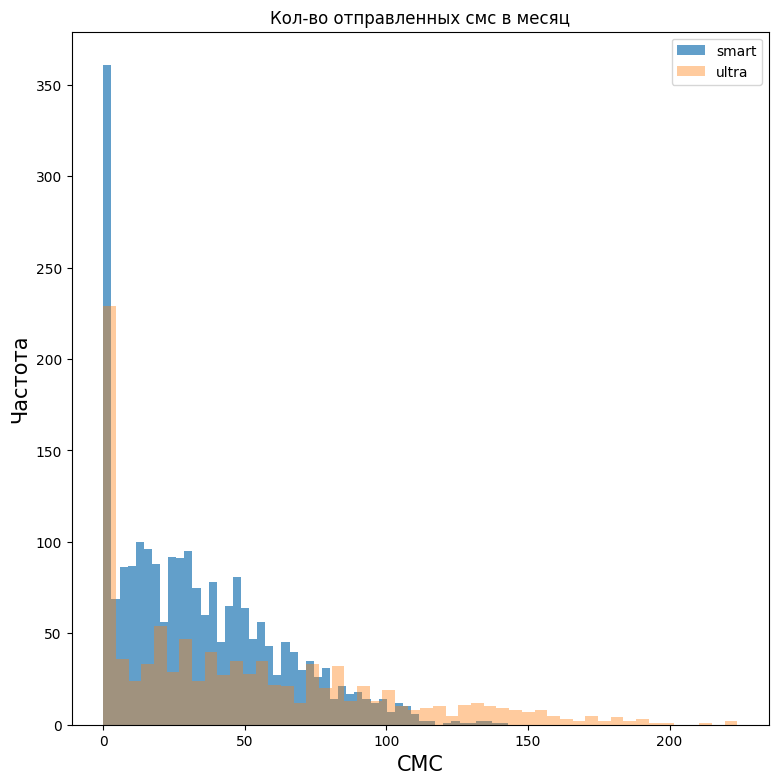

In [27]:
count_sms__smart = smart.plot(y = 'count_messages', kind = 'hist', bins = 50, label = 'smart', figsize = (9, 9), alpha = 0.7, title = 'Кол-во отправленных смс в месяц')
count_sms__ultra = ultra.plot(y = 'count_messages', ax = count_sms__smart, kind = 'hist', bins = 50, label = 'ultra', figsize = (9, 9), alpha = 0.4)
count_sms__smart.set_xlabel('СМС', fontsize = 15)
count_sms__ultra.set_ylabel('Частота', fontsize = 15)

Лимиты по количеству сообщений составляют 50 и 1000 для тарифов Smart и Ultra соответственно. Некоторые пользователи тарифа Smart превышают лимит, отправляя до 100 SMS в месяц. На тарифе Ultra ситуация аналогична: большинство пользователей не используют все 1000 сообщений, в то время как остальные укладываются в лимит до 100 SMS.

Text(0, 0.5, 'Частота')

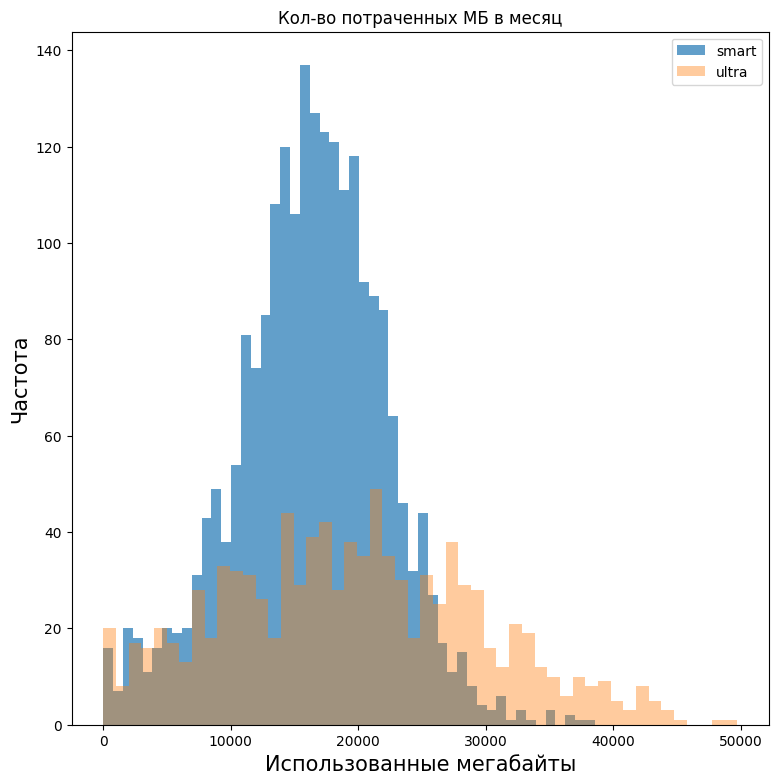

In [28]:
mb_smart = smart.plot(y = 'sum_mb_used', kind = 'hist', bins = 50, label = 'smart', figsize = (9, 9), alpha = 0.7, title = 'Кол-во потраченных МБ в месяц')
mb_ultra = ultra.plot(y = 'sum_mb_used', ax = mb_smart, kind = 'hist', bins = 50, label = 'ultra', figsize = (9, 9), alpha = 0.4)
mb_smart.set_xlabel('Использованные мегабайты', fontsize = 15)
mb_smart.set_ylabel('Частота', fontsize = 15)

Ограничение в 15 гб по тарифу Smart явно недостаточно для многих пользователей, поэтому они приобретают дополнительные пакеты интернета. Часто количество месяцев, когда превышается лимит, значительно. Абонентам тарифа Ultra, хотя и доступно 30 гб, не всегда хватает этого объема, хотя они реже превышают лимиты по сравнению с пользователями тарифа Smart.

# Вывод

    Были проанализированы данные о 500 пользователях тарифов Smart и Ultra. Тариф Ultra имеет значительно более высокую стоимость, чем Smart, однако пользователи тарифа Smart часто доплачивают за дополнительные пакеты, вследствие чего их средние расходы вдвое превышают стоимость тарифа. Большинство пользователей приобретают дополнительные гигабайты, так как сегодня многие проводят больше времени в интернете и социальных сетях. Среднее количество проговоренных минут у всех пользователей составляет около 500 минут, что совпадает с лимитом на тарифе Smart. Абоненты тарифа Ultra используют лишь небольшую часть доступных минут и SMS, а пакеты гигабайтов приобретают реже.